In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-health-and-development-2012-2021/global_health.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         1880 non-null   object 
 1   Country_Code                    1880 non-null   object 
 2   Year                            1880 non-null   int64  
 3   Fertility_Rate                  1844 non-null   float64
 4   Urban_Population_Percent        1880 non-null   float64
 5   Total_Population                1880 non-null   float64
 6   Water_Access_Percent            1225 non-null   float64
 7   Unemployment_Rate               1740 non-null   float64
 8   Sanitary_Expense_Per_GDP        1834 non-null   float64
 9   Life_Expectancy                 1840 non-null   float64
 10  Life_Expectancy_Female          1840 non-null   float64
 11  Life_Expectancy_Male            1840 non-null   float64
 12  Infant_Deaths                   18

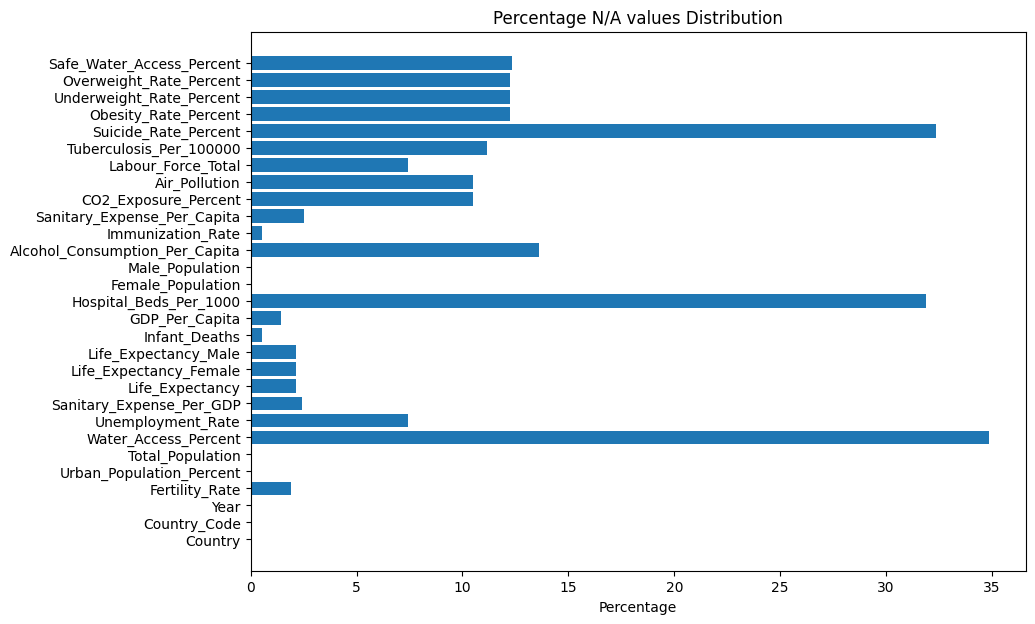

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/global-health-and-development-2012-2021/global_health.csv')
print(df.info())
print(df.describe())
plt.figure(figsize=(10, 7))
plt.barh(df.columns, df.isna().mean()*100)
plt.title('Percentage N/A values Distribution')
plt.xlabel('Percentage')
plt.show()


In [3]:

clean_df = df.copy()

numeric_columns = clean_df.select_dtypes(include=['float64']).columns

# Fill missing values for each numeric column by country
for col in numeric_columns:
    # Calculate global median for fallback
    all_nan = 0
    global_median = clean_df[col].median()
    
    for country in clean_df['Country'].unique():
        country_mask = clean_df['Country'] == country
        country_median = clean_df.loc[country_mask, col].median()
        
        # If country_median is NaN (all values were NaN), use global_median instead
        fill_value = country_median 
        if pd.notna(country_median):
            clean_df.loc[country_mask, col] = clean_df.loc[country_mask, col].fillna(fill_value)
        else:
            clean_df.loc[country_mask, col] = clean_df.loc[country_mask, col].fillna(all_nan)
        

print(clean_df.info())


/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         1880 non-null   object 
 1   Country_Code                    1880 non-null   object 
 2   Year                            1880 non-null   int64  
 3   Fertility_Rate                  1880 non-null   float64
 4   Urban_Population_Percent        1880 non-null   float64
 5   Total_Population                1880 non-null   float64
 6   Water_Access_Percent            1880 non-null   float64
 7   Unemployment_Rate               1880 non-null   float64
 8   Sanitary_Expense_Per_GDP        1880 non-null   float64
 9   Life_Expectancy                 1880 non-null   float64
 10  Life_Expectancy_Female          1880 non-null   float64
 11  Life_Expectancy_Male            1880 non-null   float64
 12  Infant_Deaths                   18

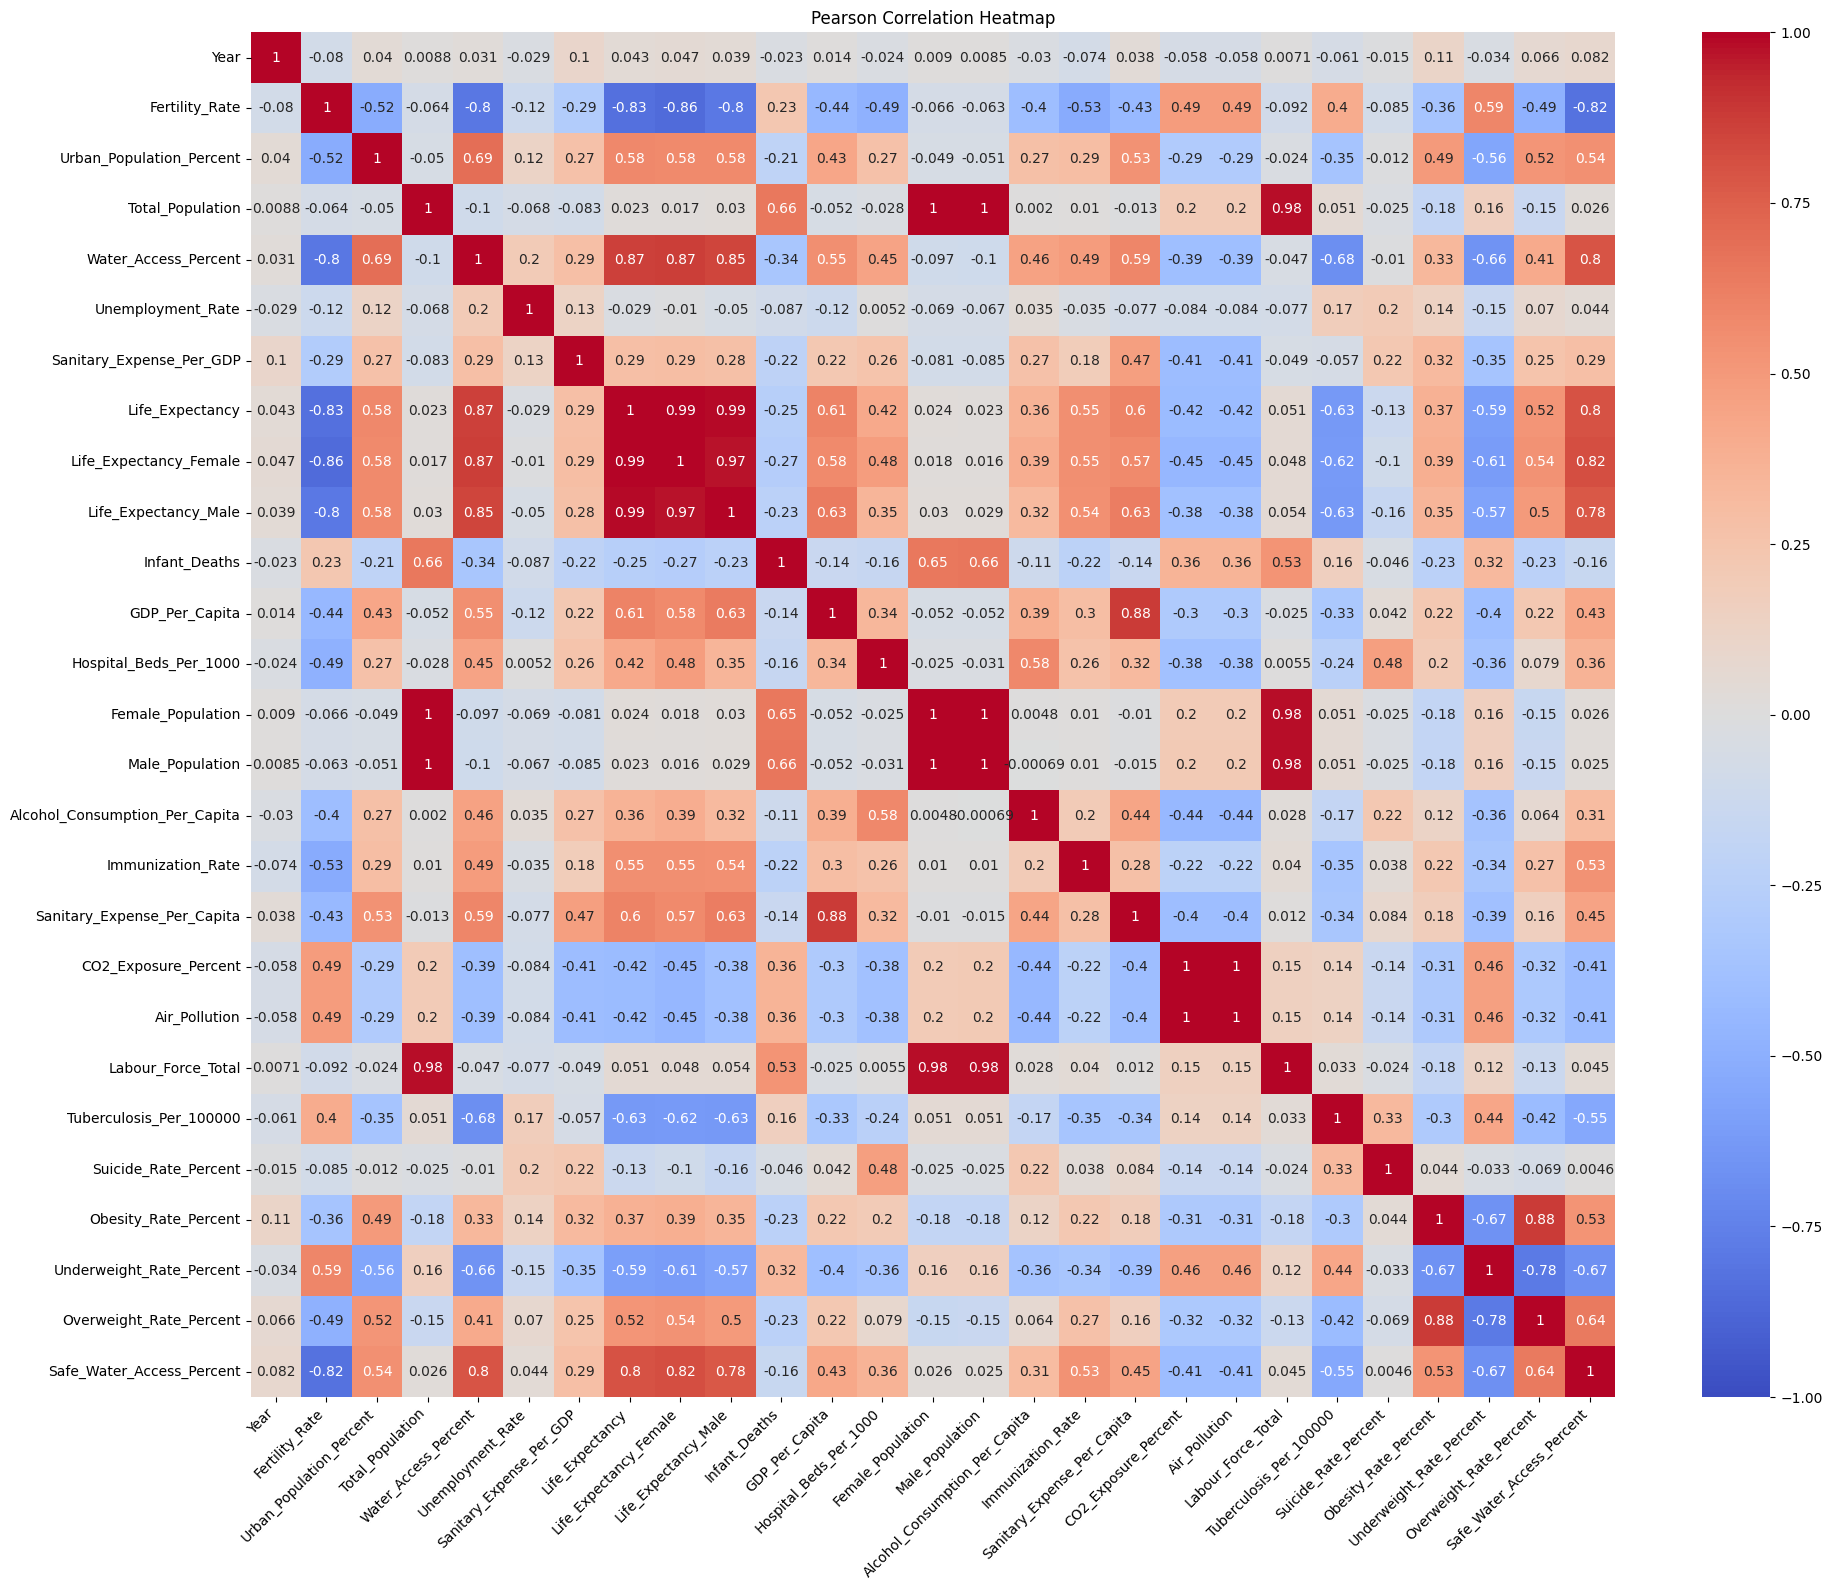

Life_Expectancy                1.000000
Life_Expectancy_Female         0.992471
Life_Expectancy_Male           0.991983
Water_Access_Percent           0.865331
Safe_Water_Access_Percent      0.804301
GDP_Per_Capita                 0.609080
Sanitary_Expense_Per_Capita    0.604867
Urban_Population_Percent       0.581083
Immunization_Rate              0.553981
Overweight_Rate_Percent        0.519396
Underweight_Rate_Percent      -0.594972
Tuberculosis_Per_100000       -0.631106
Fertility_Rate                -0.834064
Name: Life_Expectancy, dtype: float64


In [4]:
# correlation map use fillna with median
corr_matrix = df.drop(['Country','Country_Code'], axis=1).corr(method='pearson', min_periods=1)
#print(df.head())


plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, 
            annot=True,     
            cmap='coolwarm',
            center=0,       
            vmin=-1, 
            vmax=1,
            square=True)    
plt.title('Pearson Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


threshold = 0.5
significant_corr = (corr_matrix["Life_Expectancy"].abs() > threshold)
filtered_columns = corr_matrix[significant_corr]
filtered_df = pd.DataFrame(corr_matrix[significant_corr])["Life_Expectancy"]
corr_value_rank = filtered_df.sort_values(ascending=False)
print(corr_value_rank)



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

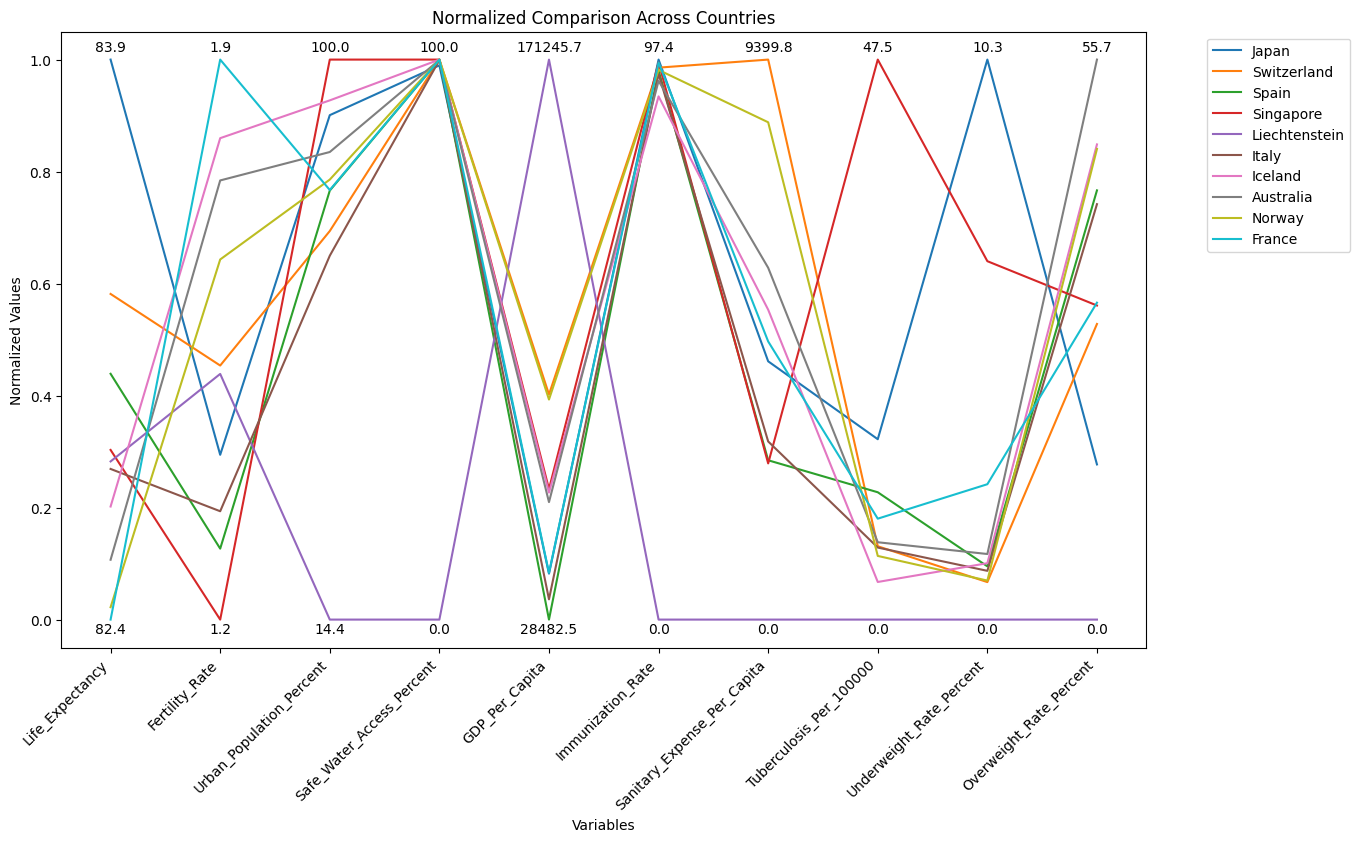

               Life_Expectancy  Fertility_Rate  Urban_Population_Percent  \
Country                                                                    
Japan                83.946732          1.3990                   91.5014   
Switzerland          83.315366          1.5160                   73.7798   
Spain                83.100244          1.2760                   79.9675   
Singapore            82.895122          1.1830                  100.0000   
Liechtenstein        82.864146          1.5050                   14.3531   
Italy                82.843902          1.3250                   70.0058   
Iceland              82.742683          1.8140                   93.7618   
Australia            82.599268          1.7586                   85.8650   
Norway               82.471463          1.6550                   81.6460   
France               82.438049          1.9170                   80.0529   

               Safe_Water_Access_Percent  GDP_Per_Capita  Immunization_Rate  \
Country 

In [5]:
choosed_columns = ["Life_Expectancy",
                   "Fertility_Rate",
                   "Urban_Population_Percent", 
                   "Safe_Water_Access_Percent", 
                   "GDP_Per_Capita", 
                   "Immunization_Rate", 
                   "Sanitary_Expense_Per_Capita",
                   "Tuberculosis_Per_100000", 
                   "Underweight_Rate_Percent", 
                   "Overweight_Rate_Percent"]
from sklearn.preprocessing import MinMaxScaler
combined_df = clean_df.assign(Country=df['Country'])
result = combined_df.groupby('Country')[choosed_columns].mean()
top10_df = result.sort_values(by="Life_Expectancy", ascending=False).head(10)

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(top10_df)
normalized_df = pd.DataFrame(normalized_data, columns=top10_df.columns, index=top10_df.index)

# Melt the DataFrame
melted_df = normalized_df.reset_index().melt(
    id_vars='Country', 
    var_name='Variables', 
    value_name='Normalized Values'
)

plt.figure(figsize=(14, 8), dpi=100)
sns.lineplot(data=melted_df, x='Variables', y='Normalized Values', hue='Country')
plt.title("Normalized Comparison Across Countries")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, var in enumerate(top10_df.columns):
    max_val = top10_df[var].max()
    plt.text(
        i, 1.01,  
        f'{max_val:.1f}',  
        ha='center', va='bottom', fontsize=10, color='black'
    )

for i, var in enumerate(top10_df.columns):
    min_val = top10_df[var].min()
    plt.text(
        i, -0.03,
        f'{min_val:.1f}',
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show() # if the minimun value shows 0 means missing data
print(top10_df)

In [6]:

from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
y = clean_df[["Life_Expectancy"]]
y = y.values.ravel()
X = clean_df[choosed_columns].drop(["Life_Expectancy"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
tpot = TPOTRegressor(
    generations=5,       
    population_size=50,  
    cv=5,                
    random_state=42      
)

tpot.fit(X_train, y_train)
predictions_noscale = tpot.predict(X_test)
R2_score_W = r2_score(y_test, predictions_noscale)
RMSE_W = np.sqrt(mean_squared_error(y_test, predictions_noscale))
print("R2_score_Without_scaled: ", R2_score_W,
      "RMSE_Without_scaled:", RMSE_W)



pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('tpot', tpot)
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
R2_score = r2_score(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print("R2_score: ", R2_score,
      "RMSE:", RMSE)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


R2_score_Without_scaled:  0.9778585335306418 RMSE_Without_scaled: 1.9024747942820468
R2_score:  0.9783255619141836 RMSE: 1.8823034763148745
